In [44]:
import numpy as np

def triple_exponential_smoothing(X,L,α,β,γ,ϕ):

	def sig_ϕ(ϕ,m):
		return np.sum(np.array([np.power(ϕ,i) for i in range(m+1)]))

	C, S, B, F = (np.zeros( X.shape[0] ) for i in range(4))
	S[0], F[0] = X[0], X[0]
	B[0] = np.mean( X[L:2*L] - X[:L] ) / L
	m = 12
	sig_ϕ = sig_ϕ(ϕ,m)
	for t in range(1, X.shape[0]):
		S[t] = α * (X[t] - C[t % L]) + (1 - α) * (S[t-1] + ϕ * B[t-1])
		B[t] = β * (S[t] - S[t-1]) + (1-β) * ϕ * B[t-1]
		C[t % L] = γ * (X[t] - S[t]) + (1 - γ) * C[t % L]
		F[t] = S[t] + sig_ϕ * B[t] + C[t % L]
	return S

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

In [81]:
ans=pd.read_csv('../data/trial/voting_withboosts.csv',index_col=0)

In [82]:
ans_raw=ans.copy()

In [4]:
ans.index = pd.to_datetime(ans.index,format='%Y%m%d')

<AxesSubplot: xlabel='일시'>

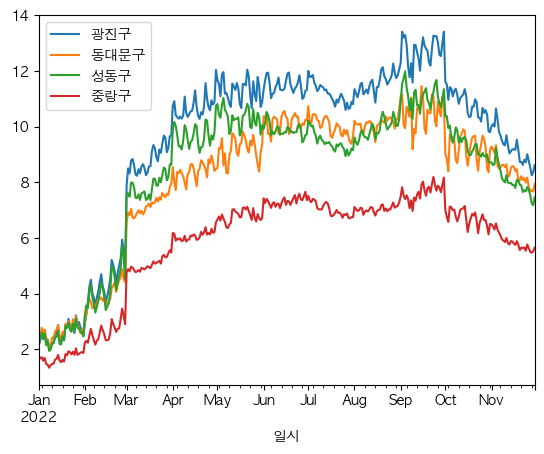

In [5]:
ans.plot()

In [8]:
ans.iloc[:,0]

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='일시', length=334, freq=None)

/opt/homebrew/Caskroom/miniforge/base/envs/crawling/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/crawling/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


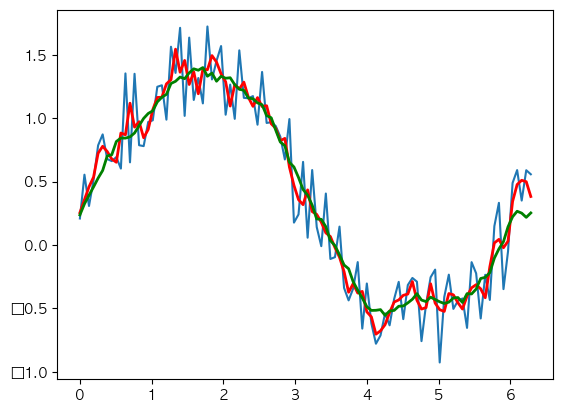

In [79]:

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.8

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# plt.plot(x, y,'o')
plt.plot(x, y)
plt.plot(x, smooth(y,3), 'r-', lw=2)
plt.plot(x, smooth(y,10), 'g-', lw=2)

In [48]:
temp=ans.copy()

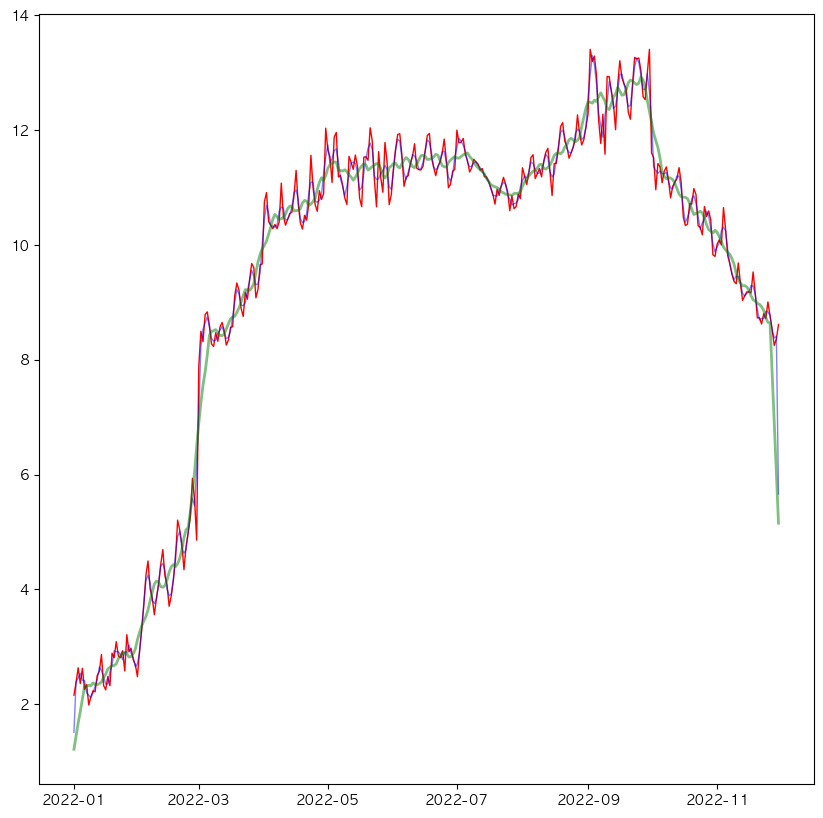

In [24]:
plt.figure(figsize=(10,10))
plt.plot(temp['광진구'].index, temp['광진구'], 'r-', lw=1)
plt.plot(temp['광진구'].index, smooth(temp['광진구'],3), 'b-', lw=1, alpha=0.5)
plt.plot(temp['광진구'].index, smooth(temp['광진구'],10), 'g-', lw=2, alpha=0.5)

/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_15273/2613044998.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(temp['동대문구'].index[:-10], temp['동대문구'][:-10], 'r-', lw=1)


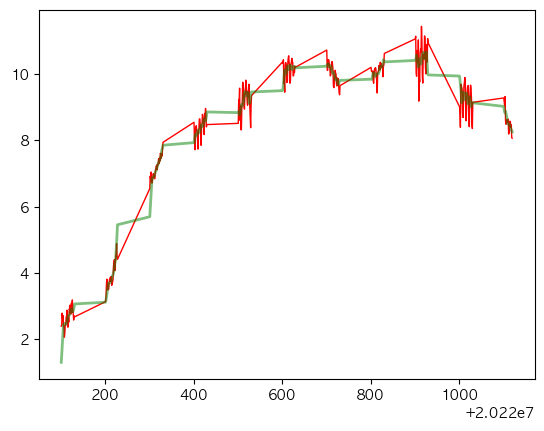

In [77]:
plt.plot(temp['동대문구'].index[:-10], temp['동대문구'][:-10], 'r-', lw=1)
plt.plot(temp['동대문구'].index[:-10], smooth(temp['동대문구'],10)[:-10], 'g-', lw=2, alpha=0.5)

In [58]:
ans = ans_raw.copy()

In [83]:
ans.iloc[10:-10,0] = smooth(ans['광진구'],4)[10:-10]
ans.iloc[10:-10,1] = smooth(ans['동대문구'],4)[10:-10]
ans.iloc[10:-10,2] = smooth(ans['성동구'],4)[10:-10]
ans.iloc[10:-10,3] = smooth(ans['중랑구'],4)[10:-10]

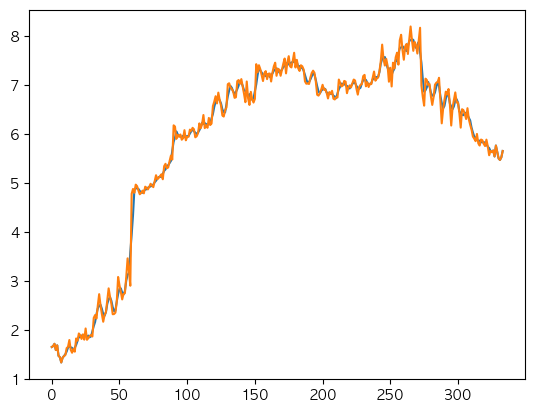

In [84]:
plt.plot(range(len(ans['중랑구'])),ans['중랑구'])
plt.plot(range(len(ans_raw['중랑구'])),ans_raw['중랑구'])

In [ ]:
plt.plot(range(len(ans_raw['광진구'])),ans_raw['광진구'])

<AxesSubplot: xlabel='일시'>

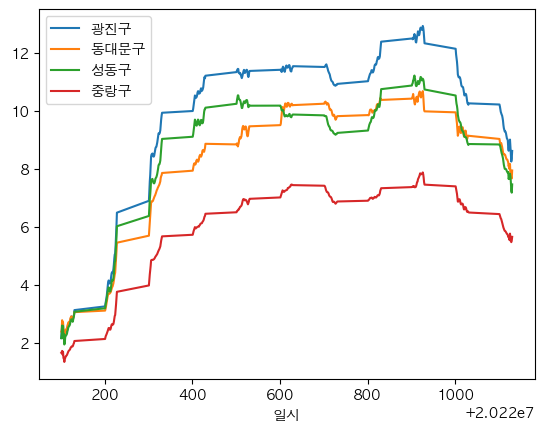

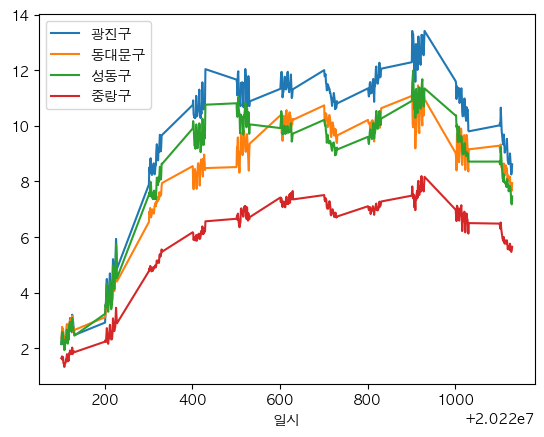

In [60]:
ans.plot()
ans_raw.plot()

In [75]:
ans_raw

,광진구,동대문구,성동구,중랑구
일시,,,,
20220101,2.158579,2.382135,2.155650,1.651358
20220102,2.380891,2.422915,2.283739,1.669951
20220103,2.636159,2.774697,2.591857,1.716550
20220104,2.362186,2.600521,2.430954,1.588913
20220105,2.627813,2.702486,2.570508,1.685573
...,...,...,...,...
20221126,8.775420,7.832803,7.730862,5.626625
20221127,8.531927,7.685429,7.539133,5.498948
20221128,8.251924,7.706543,7.238773,5.469092


In [76]:
(ans.iloc[:,:] * 0.98).to_csv('smooth_voting_ratio.csv')

In [85]:
ans.to_csv('smooth_voting_3.csv')